In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
plt.rcParams['figure.dpi'] = 150


In [3]:
chapters = pd.read_json("book_chapters.jl", lines=True)

In [4]:
chapters

,book,chapt_title,published,updated,chapt_author,chapt_text,num_comments,post_num,num_likes,liked_by
0,Extra Chapters,Charlatan II,2020-05-01T04:00:29+00:00,None,ErraticErrata,"""To be a mage is to seek to master yourself so...",35,4586,25,"[oNBWiMcDSpn2iAkihbJrjE, ggW98yF8PXbw3sidcXB5R..."
1,Extra Chapters,Five Stories,2020-08-04T04:00:23+00:00,2020-08-04T06:20:37+00:00,ErraticErrata,"There is a tale, in Levante, about vengeance. ...",85,4797,27,"[5dUESKRKHAp2at7Jupg5Jb, ggW98yF8PXbw3sidcXB5R..."
2,Extra Chapters,Disjunction,2020-10-02T04:00:39+00:00,None,ErraticErrata,People were already calling it the Peace of Sa...,42,4947,25,"[5dUESKRKHAp2at7Jupg5Jb, oNBWiMcDSpn2iAkihbJrj..."
3,Extra Chapters,Winter III,2019-11-01T04:09:06+00:00,2019-12-15T20:10:39+00:00,ErraticErrata,"""Good Gods, man, you can't simply fire arrows ...",55,4285,22,"[5dUESKRKHAp2at7Jupg5Jb, ggW98yF8PXbw3sidcXB5R..."
4,Extra Chapters,Malanza,2020-09-01T04:01:22+00:00,None,ErraticErrata,I The statue was titled ' Lorenzo Triumphant' ...,71,4871,26,"[5dUESKRKHAp2at7Jupg5Jb, oNBWiMcDSpn2iAkihbJrj..."
...,...,...,...,...,...,...,...,...,...,...
688,Extra Chapters,Conspiracy I,2016-09-07T04:37:02+00:00,2016-09-07T06:50:55+00:00,ErraticErrata,"""In its infancy, the Fifteenth was in the awkw...",46,890,25,"[Rd8kSXj47rF8Dd6AtsBzHP, gkiafAuakxJccMYC6yczP..."
689,Extra Chapters,Regard,2017-01-04T17:46:27+00:00,2017-09-18T00:10:02+00:00,ErraticErrata,"""Refuge is not a city so much as it is a clust...",102,1407,24,"[Rd8kSXj47rF8Dd6AtsBzHP, CgAQHF4R5sVdZBfULnDEj..."
690,Extra Chapters,Beast,2016-12-07T05:00:05+00:00,None,ErraticErrata,"""I stared into the abyss and found what stared...",54,1291,28,"[Rd8kSXj47rF8Dd6AtsBzHP, CgAQHF4R5sVdZBfULnDEj..."
691,Extra Chapters,Red Skies,2016-11-02T04:09:17+00:00,None,ErraticErrata,"""This eye for an eye business is horridly prop...",47,1190,20,"[Rd8kSXj47rF8Dd6AtsBzHP, CgAQHF4R5sVdZBfULnDEj..."


In [5]:
# cleaning up by converting the published and updated to datetime
chapters[["published","updated"]] = chapters[["published","updated"]].apply(pd.to_datetime)

### Chapter Lengths

In [6]:
chapters["chapter_len"] = chapters["chapt_text"].str.split().apply(len) # getting the lengths of posts

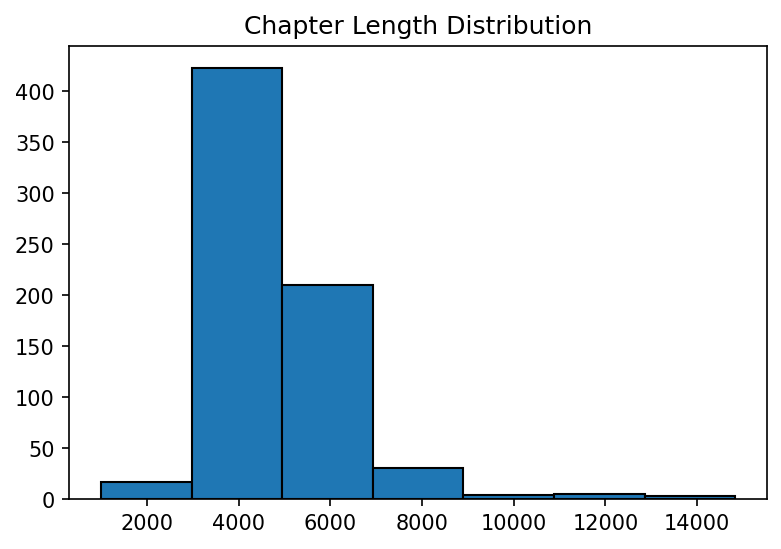

In [7]:
plt.hist(chapters["chapter_len"], bins=7, edgecolor="black")
plt.title("Chapter Length Distribution")
plt.show()

Looking at the frequencies of the values for chapter length (words), we can see that they are mostly clustered around 3,000 to 5,000 words. Let's try and zoom in a bit there for a better picture of what's going on.

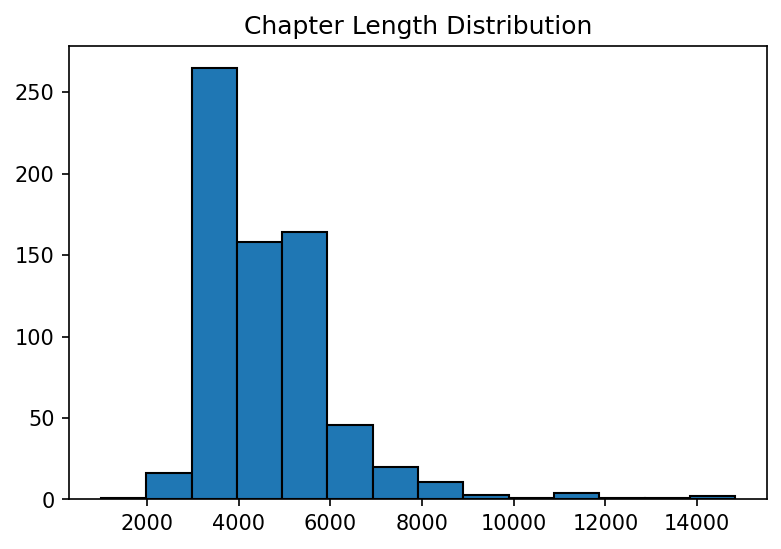

In [8]:
plt.hist(chapters["chapter_len"], bins=14, edgecolor="black")
plt.title("Chapter Length Distribution")
plt.show()

This tells us much the same story as before but we can clearly see that there are far more around 3000 than any other value. Now is this surprising? Looking at what a chapter length should be, we can see there's a __[blog post](https://blog.reedsy.com/how-long-should-a-chapter-be/#:~:text=Based%20on%20this%20dataset%20of,the%20most%20common%20sweet%20spot)__ that tells us that the sweet spot is supposedly around 3000-4000 words per chapter. So we're right about what we should expect.

### Chapter Lengths over time

Text(0.5, 1.0, 'Chapter Lengths over time')

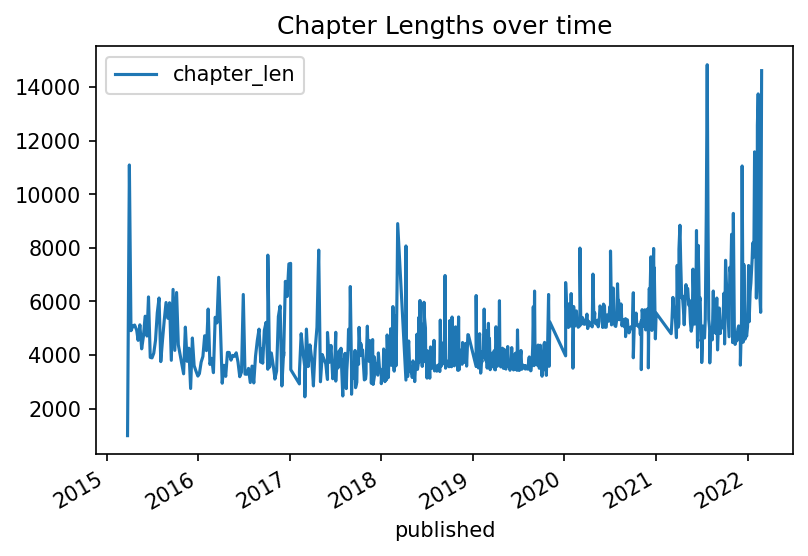

In [9]:
chapters.plot(x="published", y="chapter_len")
plt.title("Chapter Lengths over time")

Looking at that over time, we can see that it looks like the chapter length increases over time. Of course, this is a bit messy so it's a bit hard to tell for certain. 

Unfortunately, making a trend line isn't exactly straightforward when dealing with time series data in Python. We'll have to do a number of things to clean it up and make it more like what we want here.

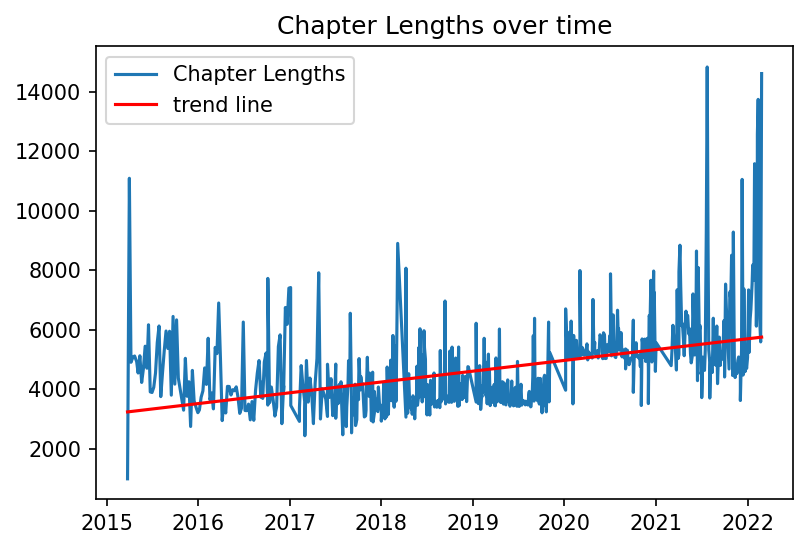

In [10]:
from scipy import stats

# we need to sort the chapters
chapters.sort_values(by="published", inplace=True)

# we need to make an ordinal -> linear regression doesn't like datetime
pub_ord = chapters["published"].apply(pd.Timestamp.toordinal) 

# making the linear regression -> we only use this for making the fitted line
lin_reg = stats.linregress(pub_ord, chapters["chapter_len"])

# plotting everything
plt.plot(chapters["published"], chapters["chapter_len"], label="Chapter Lengths") # our main trend
plt.plot(chapters["published"], lin_reg.intercept + lin_reg.slope*pub_ord, 'r', label='trend line') # our trendline
plt.title("Chapter Lengths over time")
plt.legend()
plt.show()

With the addition of the trend line, we can see that the chapter lengths *do* increase over time. This is a reminder of the value of extra elements on a visualization and how they can aid in understanding what is being worked with.

### Looking at it on a yearly aggregation of the mean

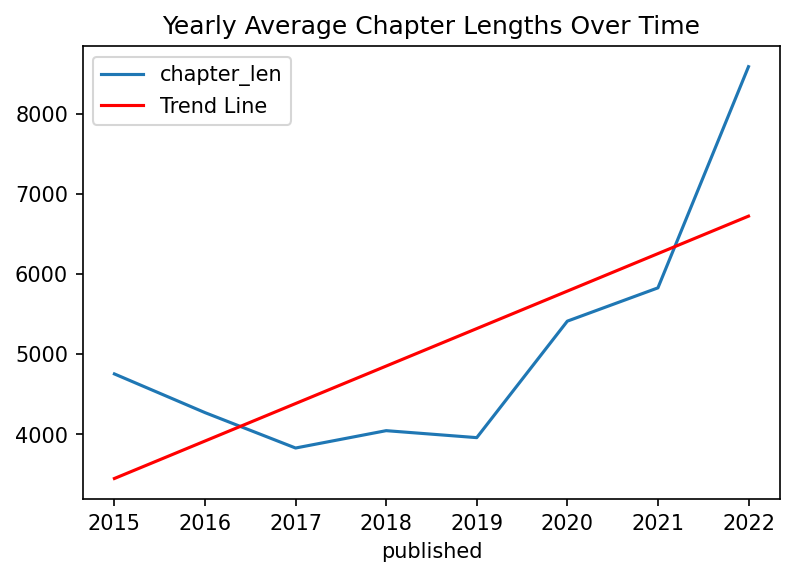

In [11]:
years = chapters.groupby(chapters["published"].dt.year).agg({"chapter_len": 'mean'}).index.values
year_avg = chapters.groupby(chapters["published"].dt.year).agg({"chapter_len": 'mean'})["chapter_len"].values

year_regress = stats.linregress(years, year_avg)

# plotting stuffs
chapters.groupby(chapters["published"].dt.year).agg({"chapter_len": 'mean'}).plot() # main plot
plt.plot(years, year_regress.intercept + year_regress.slope*years, 'r', label='Trend Line') # our trendline
plt.legend()
plt.title("Yearly Average Chapter Lengths Over Time")
plt.show()

### Looking at it on a monthly aggregation of the mean

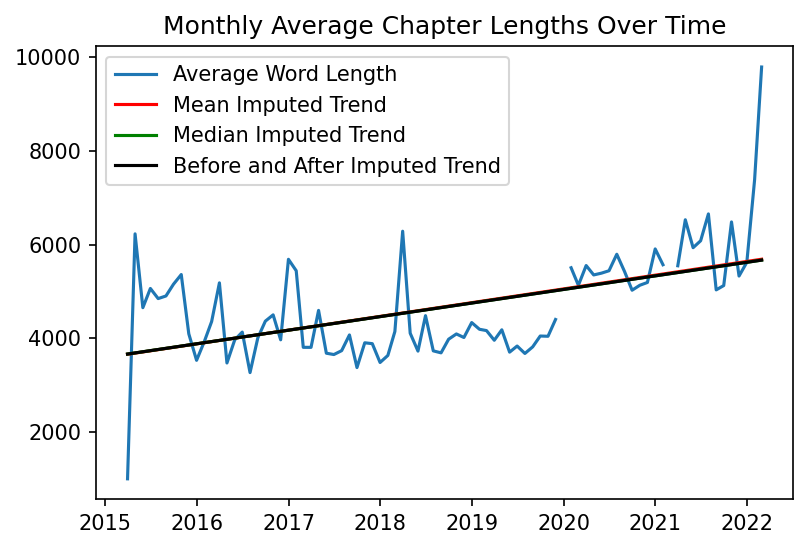

In [12]:
# first pull the data we'll want
m_resample = chapters.resample("M", on="published").mean().index.values # this is the resampling index
chapt_len_resmpld = chapters.resample("M", on="published").mean()["chapter_len"].values # this is the data over that time

# making the resamples a series
m_resample = pd.Series(m_resample)
chapt_len_resmpld = pd.Series(chapt_len_resmpld)

# change the sample to ordinal
m_ord = m_resample.apply(pd.Timestamp.toordinal) 

# replacing the NaNs -> 3 methods
clrsmpld_mean = chapt_len_resmpld.fillna(chapt_len_resmpld.mean()) # replacing with mean
clrsmpld_median = chapt_len_resmpld.fillna(chapt_len_resmpld.median()) # replacing with median
clrsmpld_ba =  (chapt_len_resmpld.ffill()+chapt_len_resmpld.bfill())/2 # replacing with average of before and after


# next, calculate the trajectory of it
mean_reg = stats.linregress(m_ord, clrsmpld_mean)
median_reg = stats.linregress(m_ord, clrsmpld_median)
ba_reg = stats.linregress(m_ord, clrsmpld_median)

# then draw stuff
plt.plot(m_resample, chapt_len_resmpld, label="Average Word Length") # our main data here
plt.plot(m_resample, mean_reg.intercept + mean_reg.slope*m_ord, 'r', label='Mean Imputed Trend') # our trendline 1
plt.plot(m_resample, median_reg.intercept + median_reg.slope*m_ord, 'green', label='Median Imputed Trend') # our trendline 2 
plt.plot(m_resample, ba_reg.intercept + ba_reg.slope*m_ord, 'black', label='Before and After Imputed Trend') # our trendline 3
plt.title("Monthly Average Chapter Lengths Over Time")
plt.legend()
plt.show()

We can see this didn't make any difference to what we're doing

One of the challenges we ran into here is the presence of NaN values. This isn't too surprising because this just means there was a period of time wherein chapters weren't published. However, this is a bit problematic for some of the stuff we would like to do. Making a trend line in the case of missing values is more difficult because we have to deal with that missing data somehow. In this case, we have to impute because we need something there and we don't want it to affect the overall trend too much. Because of the constraints, I'm implementing not 1 but 3 methods of imputation and thier resulting trend lines. 

Looking at these, we can see that even though the yearly average may hint that we have a much higher number for 2022 than the other years, we can see in the monthly trend that there isn't that much data there so it's a biased sample. 

### Book Lengths

Text(0.5, 1.0, 'Words per Book')

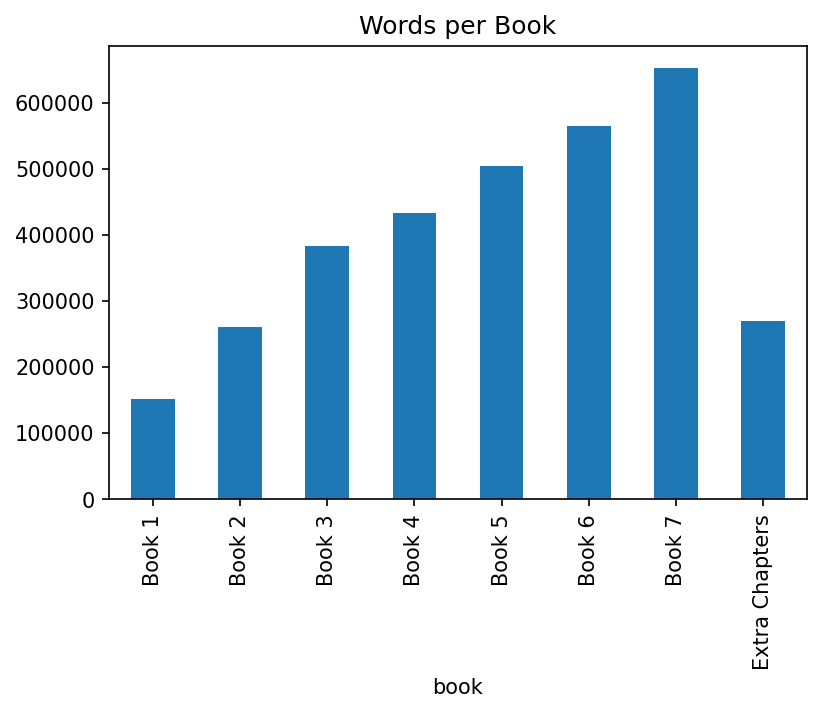

In [13]:
# let's look at the lengths of the books
chapters.groupby("book")["chapter_len"].sum().plot(kind='bar')
plt.title("Words per Book")

If we look at the aggregation of the number of words on a book level, we can cleary see that the number of words increases as the books increase. It's a pretty stable rate of growth over the course of the books. I've long suspected that authors write longer books as they go longer in their careers. 

However, it's an interesting question to ask ourselves is why this might be? In the world of publishing, it could be explained as publishers being risk averse. But what about here? There is no publisher per se; could it be a matter of confidence? Interesting to think about even though we can't find an answer in the data here.

### Chapter Lengths Grouped by Book

Text(0.5, 1.0, 'Average words per Chapter per Book')

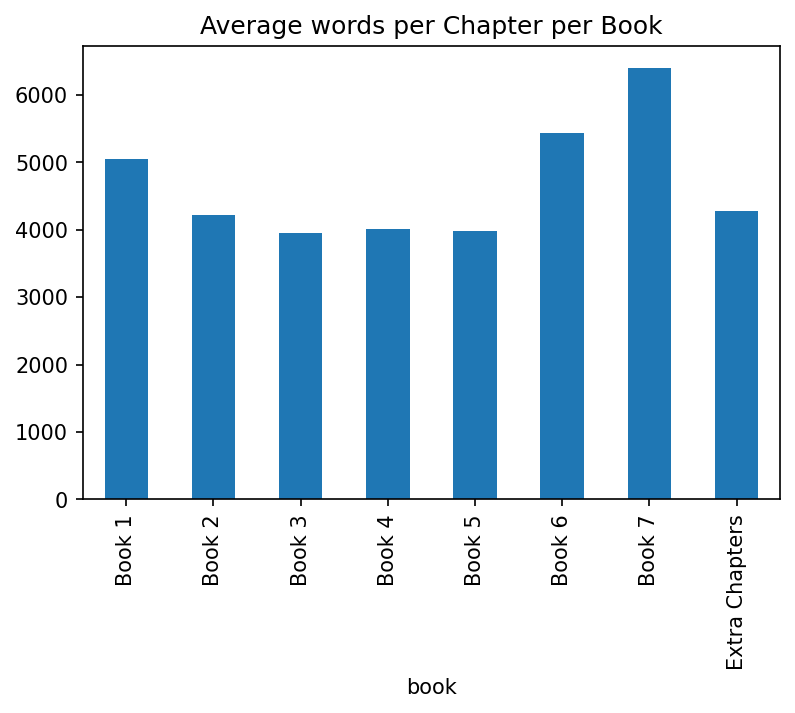

In [14]:
chapters.groupby("book")["chapter_len"].mean().plot(kind='bar')
plt.title("Average words per Chapter per Book")

Interestingly, we can see that the while the averages move around, that shouldn't explain all of what we're seeing. Maybe we should look a little elsewhere to see what might be the cause here.

Text(0.5, 1.0, 'Number of Chapters per Book')

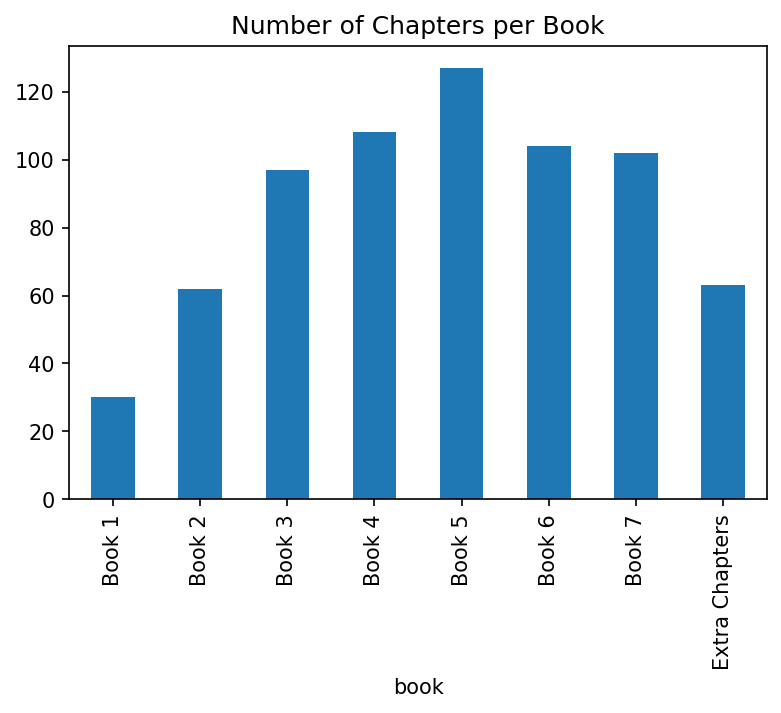

In [15]:
chapters.groupby("book")["chapt_title"].count().plot(kind='bar')
plt.title("Number of Chapters per Book")

Here, we begin to see more of an answer, there are more chapters for these later books. So not only are the word count sper chapter rising but the numbers of chapters rising as well. This is likely the cause of what we saw above.

## Comment Lengths

In [3]:
comments = pd.read_json("comments.jl", lines=True)

In [4]:
comments["comment_len"] = comments["comment_text"].str.split().apply(len)

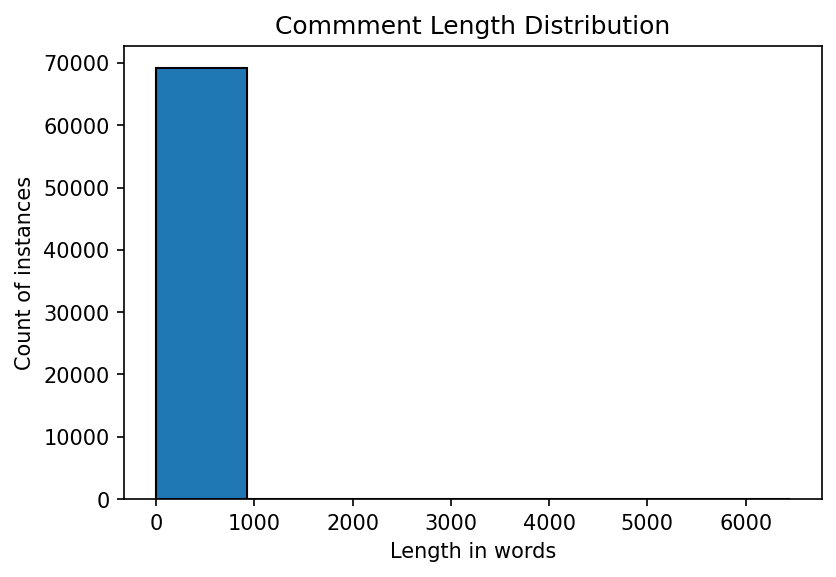

In [12]:
plt.hist(comments["comment_len"], bins=7, edgecolor="black")
plt.title("Commment Length Distribution")
plt.xlabel("Length in words")
plt.ylabel("Count of instances")
plt.show()

We can see that basically all of the comments fall into the length of less than 1000 words. Unfortunately, there are enough of those that we will have to take the longer commments into account in our later work on sentiment analysis. 

### Comment Engagement vs. Like Engagement - Comparing between

In [16]:
chapters["num_likes"].describe()

count    693.000000
mean      26.268398
std        5.992297
min        6.000000
25%       23.000000
50%       26.000000
75%       29.000000
max       85.000000
Name: num_likes, dtype: float64

In [17]:
chapters["num_comments"].describe()

count    693.000000
mean     114.748918
std       73.461054
min        5.000000
25%       61.000000
50%       96.000000
75%      152.000000
max      480.000000
Name: num_comments, dtype: float64

Looking at the comments and the likes, we can see there are some clear trends here. There are more comments and there is greater deviation within the number of comments than there is within likes. Of course, we can't really compare apples to oranges here, but it seems to be clear that comments have more interesting things for us to look at in a lot of respects.

### Comment Engagement vs. Like Engagement - Over Time

Text(0.5, 1.0, 'Comments vs. Like Engagement - Over Time')

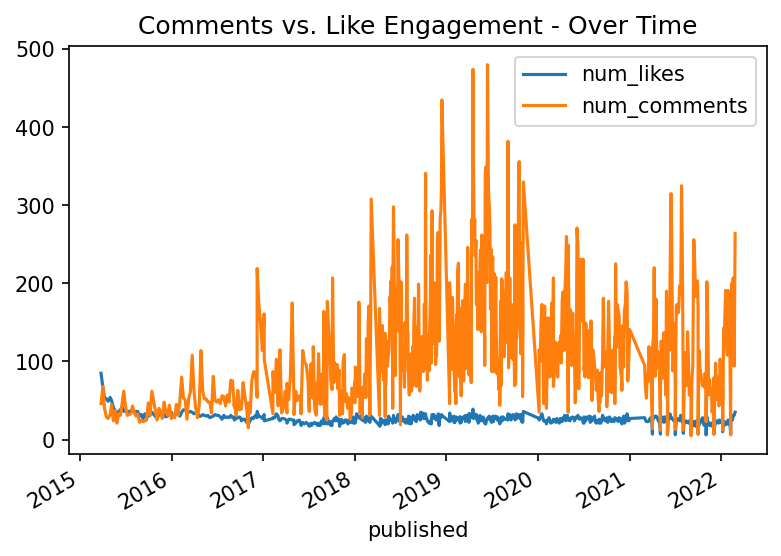

In [18]:
chapters.plot(x="published", y=["num_likes", "num_comments"])
plt.title("Comments vs. Like Engagement - Over Time")


Looking at this, it would seem that the number of likes remains fairly stable over time while the number of comments sees a lot of spikes. Thus, it looks like engagement is higher in the comments than it is in the likes. This is an interesting thing to see because normally, I'd expect the opposite to occur. This is because all else being equal, it's easier to like something than it is to commment on something. However, I think it'd be clearer if we cleaned it up just a smidge.

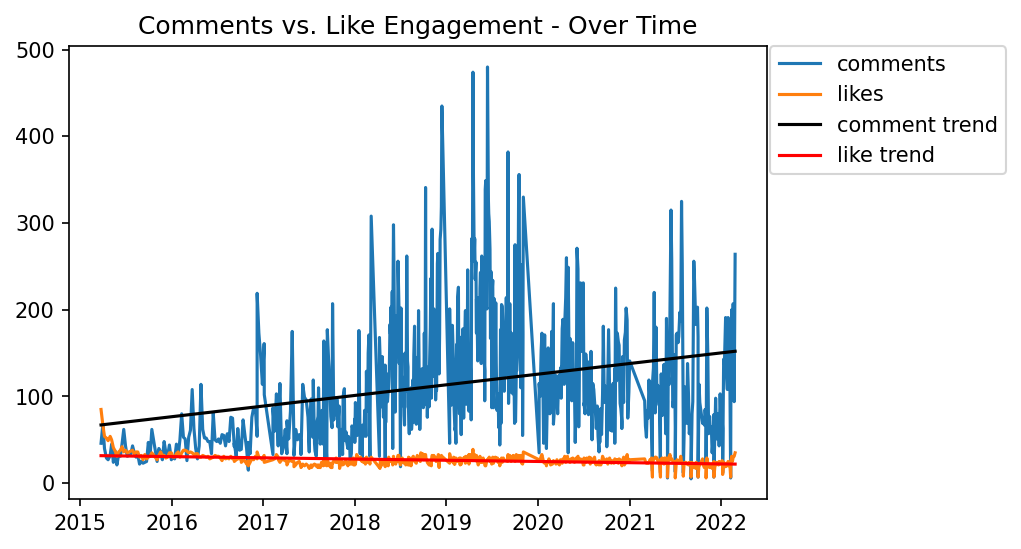

In [19]:
# we need to sort the chapters -> if we *know* it's sorted we can omit this
# chapters.sort_values(by="published", inplace=True)

# we need to make an ordinal -> linear regression doesn't like datetime
pub_ord = chapters["published"].apply(pd.Timestamp.toordinal) 

# making the linear regression -> we only use this for making the fitted line
comment_line = stats.linregress(pub_ord, chapters["num_comments"])
like_line = stats.linregress(pub_ord, chapters["num_likes"])

# plotting everything
plt.plot(chapters["published"], chapters["num_comments"], label="comments")
plt.plot(chapters["published"], chapters["num_likes"], label="likes")
plt.plot(chapters["published"], comment_line.intercept + comment_line.slope*pub_ord, 'black', label='comment trend')
plt.plot(chapters["published"], like_line.intercept + like_line.slope*pub_ord, 'r', label='like trend')
plt.title("Comments vs. Like Engagement - Over Time")
plt.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0)
plt.show()

Adding in trend lines shows us that there is a general trend upward in terms of the number of comments for chapters. At the same time, we can see a *decrease* in the number of likes over time. This would hint that if we're working on a project here where we care about engagement over time, likes aren't a reliable metric for our purposes. 

### Comment Engagement vs. Like Engagement - Group Comparison

In [20]:
comments = pd.read_json("comments.jl", lines=True) # reading in the comments

In [21]:
comments

,comment_author,comment_id,timestamp,comment_text,num_likes,parent_id,post_num
0,LVcgUyJmfsJXGQXkzYqjWE,66591,2020-05-01 04:25:14+00:00,Huh. That was a clever solution ... but it's ...,1,NaN,4586
1,JXjFi55Dcd82gTxZsoJSRQ,66594,2020-05-01 04:35:34+00:00,And just when I thought that I couldn't like R...,1,NaN,4586
2,2fx886abHdvhC4sFgWmQJk,66622,2020-05-01 05:11:45+00:00,Still insisting the Olivier replaced Roland? ...,2,66594.0,4586
3,TjCbfSbLek9dwBSoiZzHcV,66630,2020-05-01 05:23:28+00:00,"Ah, but that makes the hit when the subversion...",1,66622.0,4586
4,PQhgztgfDxTfnFxLUgkSh2,66634,2020-05-01 05:28:10+00:00,My guess is Olivier and Roland 'swap' names in...,6,66622.0,4586
...,...,...,...,...,...,...,...
69312,2W4JiuJBhoVU8ReKciEuzX,25507,2018-10-24 22:37:26+00:00,And now I like the Dead King even more that we...,0,NaN,1407
69313,DZzG9V2BDTVMS6AH79oZDP,41722,2019-05-11 13:43:00+00:00,"Okay, Ranger is my favoritest character now. D...",0,NaN,1407
69314,GjxGcApwwY8EYgenwhsxfV,74175,2020-08-24 20:56:22+00:00,"Apologies if this has been raised already, sho...",0,NaN,1407
69315,NM9eUUdQR6uTbLtRD5EAdT,82566,2021-02-25 17:13:07+00:00,"4th reread: \n2:15 - Council \n""Kilian of Mash...",0,NaN,1407


In [75]:
author_sets = (chapters[["post_num","liked_by"]].set_index("post_num").join(comments.groupby("post_num").agg(lambda x: list(x))["comment_author"]))

In [ ]:
# merge doesn't return the way I think it is right here -> issue with length

In [76]:
# changing things into sets -> have to do it individually for some reasons :(
author_sets["liked_by"] = author_sets["liked_by"].apply(set)
author_sets["comment_author"] = author_sets["comment_author"].apply(set)

In [79]:
# getting the intersection of the author sets
author_sets["eng_intersect"] = author_sets.apply(lambda row: row["liked_by"].intersection(row["comment_author"]), axis=1)

In [84]:
author_sets["overlap_count"] = author_sets["eng_intersect"].str.len()

Text(0, 0.5, 'Count of instances')

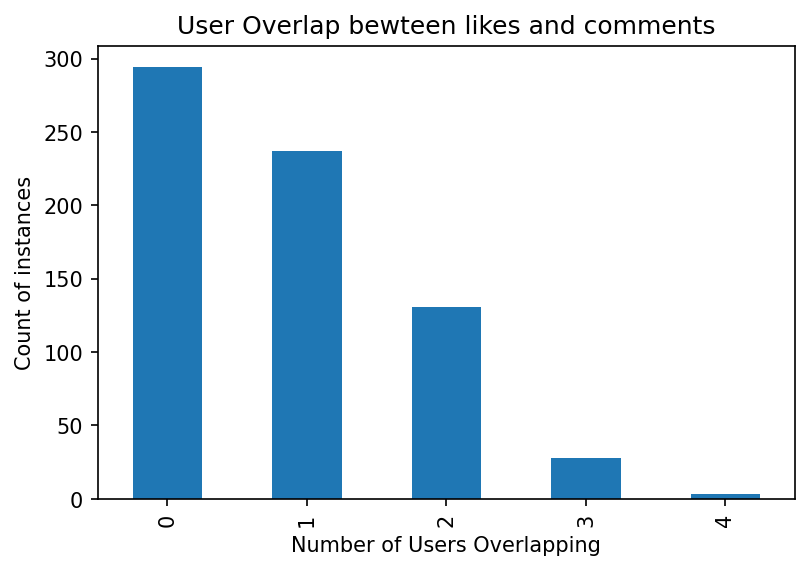

In [89]:
author_sets["overlap_count"].value_counts().plot(kind="bar")
plt.title("User Overlap bewteen likes and comments")
plt.xlabel("Number of Users Overlapping")
plt.ylabel("Count of instances")

Looking at this, it would appear that there isn't much overlap between the two sets of users. Unfortunately, we can't be certain that the way a username appears in the comments is the same as the way it appears in the likes. Thus, we can't say with certainty that this *is* the actual overlap. It would seem to be a good hint that it's not completely zero for the overlap, but because we can't use UUIDs generated by the website for users, our process of anonymization *may* have had an impact here.

### Comment Engagement vs. Like Engagement - Group Stability

In [90]:
# not sure how to do this one tbh